In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:>

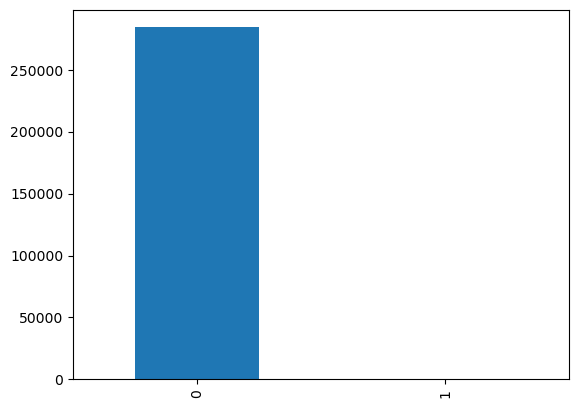

In [84]:
data['Class'].value_counts().plot.bar()

In [85]:
print('Proportion of the classes in the data:')
print(data['Class'].value_counts() / len(data))

Proportion of the classes in the data:
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [86]:
data.shape

(284807, 31)

In [87]:
data = data.drop(['Time'], axis = 1)
X = np.array(data.loc[:, data.columns != 'Class'])
y = np.array(data.loc[:, data.columns == 'Class']).reshape(-1, 1)

In [88]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [89]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

In [90]:
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

### Without SMOTE

In [91]:
# fit the model
clf.fit(X_train, y_train.ravel())

# prediction for training dataset
train_pred = clf.predict(X_train)

# prediction for testing dataset
test_pred = clf.predict(X_test)

In [92]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.9991248296824232
Accuracy score for Testing Dataset =  0.9992871354549033


In [93]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted       0    1     All
True                          
0          190457   33  190490
1             134  196     330
All        190591  229  190820


### Using SMOTE

In [ ]:
pip install SMOTE

In [109]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [110]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

<AxesSubplot:>

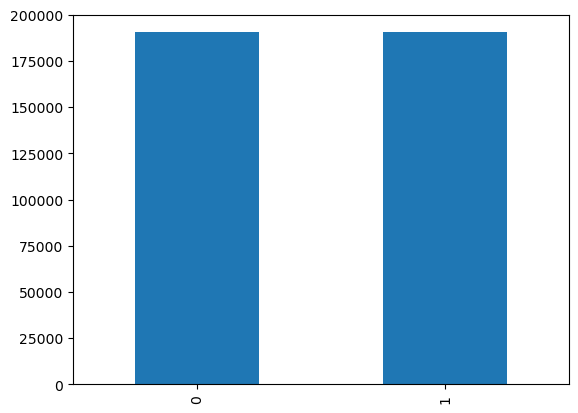

In [111]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [112]:
# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [113]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.9425271667804084
Accuracy score for Testing Dataset =  0.9720812452786024


Our accuracy has reduced. But our model has definitely improved. Observe the confusion matrices.

In [114]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted       0       1     All
True                             
0          185279    5211  190490
1           16685  173805  190490
All        201964  179016  380980


In [115]:
16685/190490

0.08758989973226941

16685 out of 190490 fraud cases have been classified as not fraud. This is a mere 8.7% compared to the previous 41%.

A vast improvement!

In [116]:
# Same is the case with the Testing Dataset.

print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted      0     1    All
True                         
0          91213  2612  93825
1             12   150    162
All        91225  2762  93987


In [117]:
12/162

0.07407407407407407

Roughly 7.4% of the fraud classes have been classified as not fraud.

### Conclusion

One might argue that the reduced accuracy is an indicator of lower model performance. However, this is not true.

Error in prediction can be made in two ways:

Classifying not fraud as fraud Classifying fraud as not fraud It should not be hard to understand that the second error is costlier than the first.

The objective of each classification problem is different. So make sure to evaluate each model with respect to its own objective instead of merely judging it on its accuracy.

There are many sampling techniques for balancing data. SMOTE is just one of them. But, there’s no single best technique. Generally, you need to experiment with a few of them before deciding on one. 

In [3]:
# basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import make_blobs, make_classification

# create a imbalanced dataset of 10K with 2 class
x,y = make_classification(n_samples=10000  # number of samples
                          ,n_features=2    # feature/label count
                          ,n_informative=2 # informative features
                          ,n_redundant=0   # redundant features
                          ,n_repeated=0    # duplicate features
                          ,n_clusters_per_class=1  # number of clusters per class; clusters during plotting
                          ,weights=[0.99]   # proportions of samples assigned to each class
                          ,flip_y=0         # fraction of samples whose class is assigned randomly. 
                          ,random_state=13 )

# club together into a dataframe
df = pd.DataFrame(x,columns=['x1','x2'])
df['y'] = y

In [4]:
# check the distribution
df['y'].value_counts()/df.shape[0]

y
0    0.99
1    0.01
Name: count, dtype: float64

<Axes: xlabel='x1', ylabel='x2'>

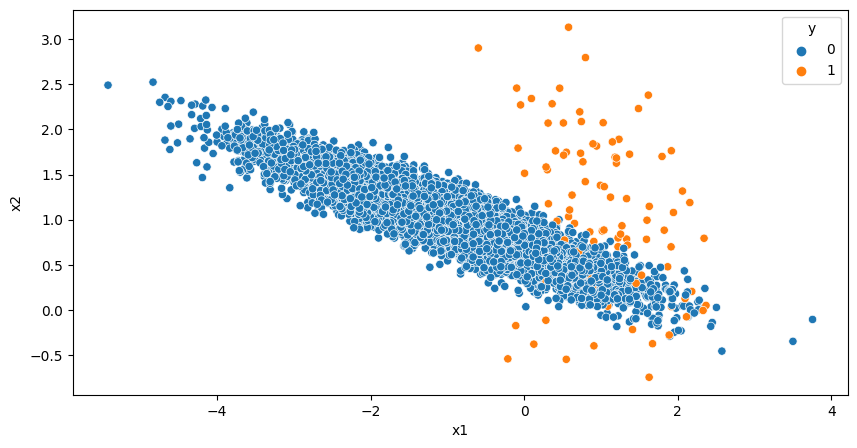

In [5]:
# Lets plot distribution with different color to each class.

# scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y')

In [124]:
# import model and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

# split dataset into x,y
x = df.drop('y',axis=1)
y = df['y']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)

### Logistic regression (Default)

In [125]:
# lets build a logistic regression with default weights.

# define model
lg1 = LogisticRegression(random_state=13, class_weight=None)

# fit it
lg1.fit(X_train,y_train)

# test
y_pred = lg1.predict(X_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9946666666666667
Confusion Matrix: 
[[2970    1]
 [  15   14]]
Area Under Curve: 0.7412110168409568
Recall score: 0.4827586206896552


For minority class, above model is able to predict 14 correct out of 29 samples. For majority class, model got only one prediction wrong. Model is not doing a good job in predicting minority class. Nonetheless, with these default weights performance values, we got benchmark to measure subsequent model modifications.

### Weighted Logistic Regression

In [127]:
# define class weights
# w = {0:1, 1:99}

# define model
lg2 = LogisticRegression(random_state=13, class_weight=w)

# fit it
lg2.fit(X_train,y_train)

# test
y_pred = lg2.predict(X_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.898
Confusion Matrix: 
[[2669  302]
 [   4   25]]
Area Under Curve: 0.880209844589654
Recall score: 0.8620689655172413


With weighted-LG, Area-Under-Curve (AUC) increased drastically from 0.7412 to 0.8802. Recall score imporved from 0.4827 to 0.8620. Correct predictions for minority label increased as well. Though model has few wrong prediction in majority class, but custom weights have shown improvement in predicting minority class as expected.

In [128]:
################################################################################################################################

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [142]:
# read in data
df = pd.read_csv('d:/data/data/creditcard.csv')

print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [143]:
# Modeling the data as is
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
accuracy_score(y_test, lr_pred)

0.9943333333333333

In [144]:
# Let’s see what happens when we apply these F1 and recall scores to our logistic regression from above.

# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    2986
1      14
Name: 0, dtype: int64

### Change the performance metric

Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
F1: Score: the weighted average of precision and recall.
Let’s see what happens when we apply these F1 and recall scores to our logistic regression from above.

In [145]:
# f1 score
f1_score(y_test, lr_pred)

0.6046511627906977

In [146]:
# recall score
recall_score(y_test, lr_pred)

0.4482758620689655

### Change the algorithm

While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets. Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

In [147]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

In [148]:
accuracy_score(y_test, rfc_pred)

0.9956666666666667

In [149]:
f1_score(y_test, rfc_pred)

0.7346938775510204

In [150]:
recall_score(y_test, rfc_pred)

0.6206896551724138

While our accuracy score is slightly lower, both F1 and recall have increased as compared to logistic regression! It appears that for this specific problem, random forest may be a better choice of model.

### Resampling Techniques — Oversample minority class

Our next method begins our resampling techniques.

Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

Always split into test and train sets BEFORE trying oversampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [151]:
from sklearn.utils import resample

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [152]:
# check new class counts
upsampled.Class.value_counts()

0    213245
1    213245
Name: Class, dtype: int64

After resampling we have an equal ratio of data points for each class! Let’s try our logistic regression again with the balanced training data.

In [153]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [154]:
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.9807589674447347

In [155]:
# f1 score
f1_score(y_test, upsampled_pred)

0.14375000000000002

In [156]:
recall_score(y_test, upsampled_pred)

0.8712121212121212

### Resampling techniques — Undersample majority class

Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

We will again use the resampling module from Scikit-Learn to randomly remove samples from the majority class.

In [157]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

In [158]:
# checking counts
downsampled.Class.value_counts()

0    360
1    360
Name: Class, dtype: int64

Again, we have an equal ratio of fraud to not fraud data points, but in this case a much smaller quantity of data to train the model on. Let’s again apply our logistic regression.

In [159]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [160]:
# Checking accuracy
accuracy_score(y_test, undersampled_pred)

0.9758574197354007

In [161]:
# f1 score
f1_score(y_test, undersampled_pred)

0.11710323574730355

In [162]:
recall_score(y_test, undersampled_pred)

0.8636363636363636

### Generate synthetic samples

A technique similar to upsampling is to create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

In [165]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

After generating our synthetic data points, let’s see how our logistic regression performs.

In [166]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

In [167]:
# Checking accuracy
accuracy_score(y_test, smote_pred)

0.9858571388444145

In [168]:
# f1 score
f1_score(y_test, smote_pred)

0.18461538461538463

In [169]:
recall_score(y_test, smote_pred)

0.8636363636363636

Our F1 score is increased and recall is similar to the upsampled model above and for our data here outperforms undersampling.

### Conclusion

We explored 5 different methods for dealing with imbalanced datasets:

Change the performance metric
Change the algorithm
Oversample minority class
Undersample majority class
Generate synthetic samples
It appears for this particular dataset random forest and SMOTE are among the best of the options we tried here.

These are just some of the many possible methods to try when dealing with imbalanced datasets, and not an exhaustive list. Some others methods to consider are collecting more data or choosing different resampling ratios — you don’t have to have exactly a 1:1 ratio!

You should always try several approaches and then decide which is best for your problem.